# Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

# Data Reading and Processing

In [3]:
df_raw = pd.read_csv('../input/train.csv')

In [25]:
df_trn, y_trn, nas = proc_df(df_raw, 'label')

In [26]:
df_trn /= 255

In [27]:
def split_vals(a,n): return a[:n], a[n:]
n_valid = 8400

In [28]:
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((33600, 784), (8400, 784), (33600,), (8400,))

# Base Model

In [29]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
[m.score(X_train, y_train), m.score(X_valid, y_valid)]

Wall time: 615 ms


[0.9992261904761904, 0.9403571428571429]

In [30]:
m = RandomForestClassifier(n_estimators=250, n_jobs=-1)
%time m.fit(X_train, y_train)
[m.score(X_train, y_train), m.score(X_valid, y_valid)]

Wall time: 13.4 s


[1.0, 0.9679761904761904]

# Feature importance

In [31]:
fi = rf_feat_importance(m, df_trn)
fi[:10]

,cols,imp
378,pixel378,0.009873
350,pixel350,0.009053
461,pixel461,0.007843
437,pixel437,0.007756
433,pixel433,0.007633
406,pixel406,0.007372
347,pixel347,0.007349
155,pixel155,0.007298
409,pixel409,0.007026
542,pixel542,0.006747


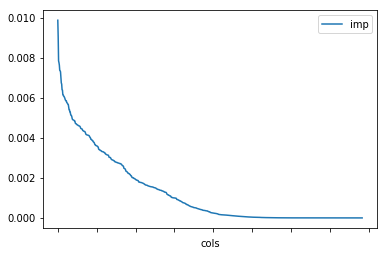

In [32]:
fi.plot('cols', 'imp');

In [33]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

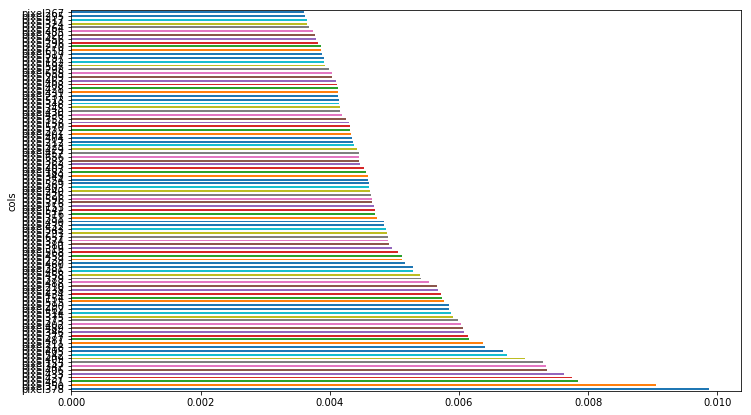

In [34]:
plot_fi(fi[:100])
plt.show()

In [35]:
to_keep = fi[fi.imp>0.002].cols; len(to_keep)

195

In [36]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [37]:
m = RandomForestClassifier(n_jobs=-1)
%time m.fit(X_train, y_train)
[m.score(X_train, y_train), m.score(X_valid, y_valid)]

Wall time: 500 ms


[0.9986607142857142, 0.9323809523809524]

In [38]:
m = RandomForestClassifier(n_estimators=250, n_jobs=-1)
%time m.fit(X_train, y_train)
[m.score(X_train, y_train), m.score(X_valid, y_valid)]

Wall time: 12.9 s


[1.0, 0.9613095238095238]

In [40]:
m = RandomForestClassifier(n_estimators=250, min_samples_leaf=3, n_jobs=-1)
%time m.fit(X_train, y_train)
[m.score(X_train, y_train), m.score(X_valid, y_valid)]

Wall time: 9.47 s


[0.9953869047619047, 0.9566666666666667]